# Optimizing Gradient Boosting Classifier Parameters for Wine Classification


Optimizing parameters using RandomizedSearchCV

Best Parameters:
{'subsample': 0.75, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.5}


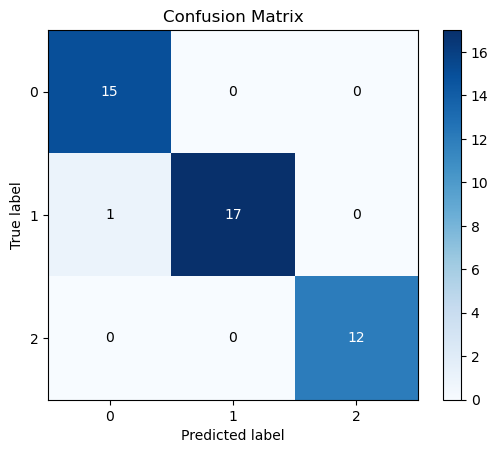

Accuracy: 0.9777777777777777
Confusion Matrix:
[[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
def optimize_parameters(): 
    print("\nOptimizing parameters using RandomizedSearchCV\n")    
    
    # Load the wine dataset
    dataset = datasets.load_wine()
    X = dataset.data
    y = dataset.target

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Define the model
    model = GradientBoostingClassifier()

    # Define the parameters to optimize
    parameters = {'learning_rate': [0.1, 0.5, 1.0],
                  'subsample': [0.5, 0.75, 1.0],
                  'n_estimators': [100, 500, 1000],
                  'max_depth': [4, 6, 8]}

    # Define the RandomizedSearchCV object
    randm = RandomizedSearchCV(estimator=model, param_distributions=parameters, 
                               cv=3, n_iter=10, n_jobs=-1, random_state=42)

    # Fit the model with the best parameters
    best_model = randm.fit(X_train, y_train)
    best_params = best_model.best_params_

    # Print the best parameters
    print("Best Parameters:")
    print(best_params)

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion)

optimize_parameters()
